In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import scipy

In [45]:
data = pd.read_csv("penguins_lter.csv")
colnames = list(data.select_dtypes(["number"]).columns)

species = data["Species"]
islands = data["Island"]
cl = data["Culmen Length (mm)"]
cd = data["Culmen Depth (mm)"]
fl = data["Flipper Length (mm)"]
bm = data["Body Mass (g)"]
dc = data["Delta 13 C (o/oo)"]
dn = data["Delta 15 N (o/oo)"]

unique_species = species.unique()

[]

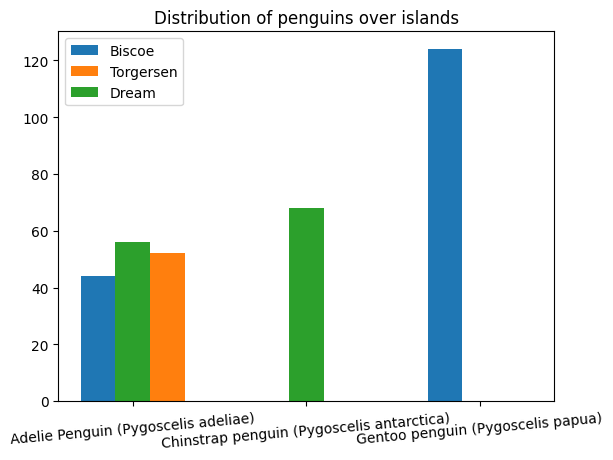

In [48]:
biscoe = data.loc[data["Island"] == "Biscoe"]["Species"].value_counts().to_dict()
torgersen = data.loc[data["Island"] == "Torgersen"]["Species"].value_counts().to_dict()
dream = data.loc[data["Island"] == "Dream"]["Species"].value_counts().to_dict()

for island in (biscoe, torgersen, dream):
    for sp in unique_species:
        if not sp in island:
            island[sp] = 0
    
biscoe = dict(sorted(biscoe.items()))
torgersen = dict(sorted(torgersen.items()))
dream = dict(sorted(dream.items()))

x = np.arange(len(unique_species))  # the label locations
width = 0.2  # the width of the bars

plt.title("Distribution of penguins over islands")

plt.bar(x-width, biscoe.values(), width, label="Biscoe")
plt.bar(x+width, torgersen.values(), width, label="Torgersen")
plt.bar(x, dream.values(), width, label="Dream")

plt.xticks(x, unique_species, rotation=7)
plt.legend()
plt.plot()

/tmp/ipykernel_8890/1178781099.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(data.corr())


(array([0.00956938, 0.04253057, 0.06060606, 0.05103668, 0.05209995,
        0.05847953, 0.06485912, 0.01701223, 0.00531632, 0.00212653]),
 array([32.1 , 34.85, 37.6 , 40.35, 43.1 , 45.85, 48.6 , 51.35, 54.1 ,
        56.85, 59.6 ]),
 <BarContainer object of 10 artists>)

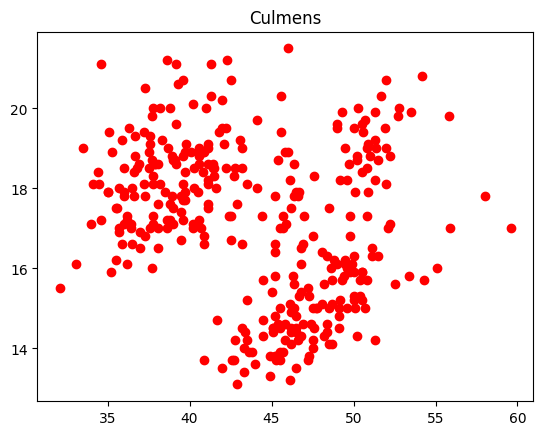

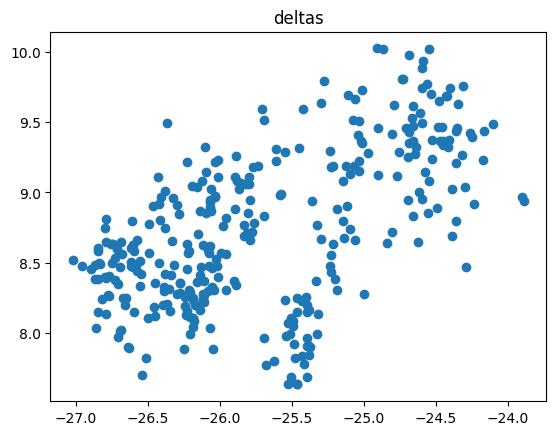

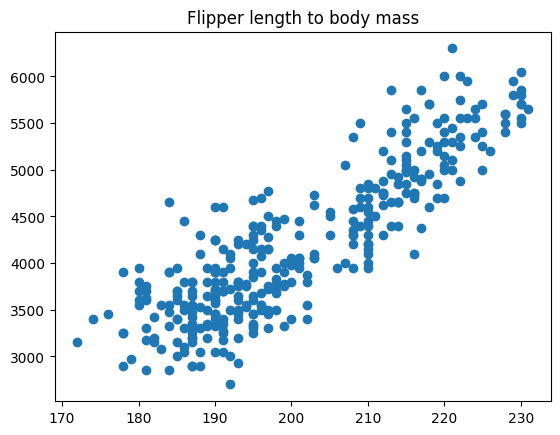

<Figure size 640x480 with 0 Axes>

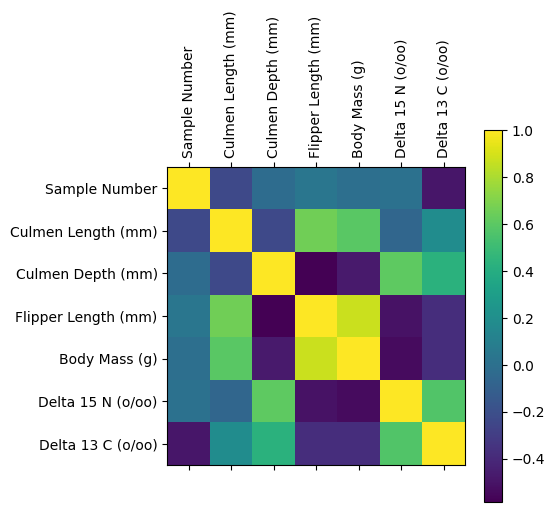

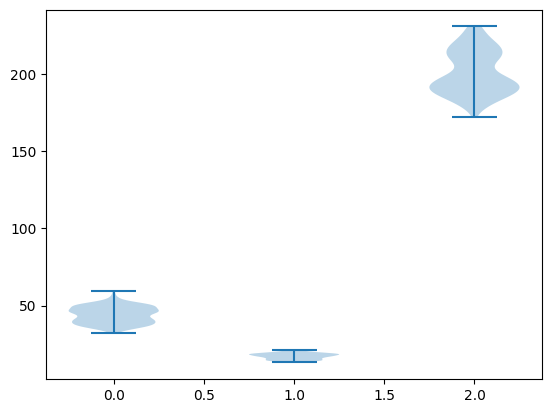

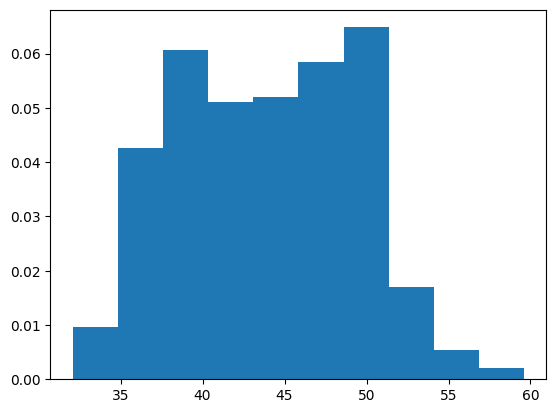

In [5]:

plt.title("Culmens")
plt.scatter(cl, cd)
plt.figure()
plt.title("deltas")
plt.scatter(dc, dn)
plt.figure()
plt.title("Flipper length to body mass")
plt.scatter(fl, bm)
plt.figure()

plt.matshow(data.corr())
plt.colorbar()
plt.xticks(range(7),colnames, rotation=90)
plt.yticks(range(7),colnames)
plt.figure()
clc = cl[~cl.isnull()]
cdc = cd[~cd.isnull()]
flc = fl[~fl.isnull()]
plt.violinplot([clc, cdc, flc], [0, 1, 2])
plt.figure()
plt.hist(cl, density=True)
